In [24]:
import pickle
import pathlib

import numpy as np
import pandas as pd

In [25]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

d:\machine-learning\ames\data


In [26]:
clean_data_path = DATA_DIR / 'processed' / 'ames_final.pkl'

In [27]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [28]:
numeric_cols = data.select_dtypes(include=np.number).columns
categorical_cols = data.select_dtypes(exclude=np.number).columns

In [29]:
corr = data.corr(numeric_only=True)

<Axes: >

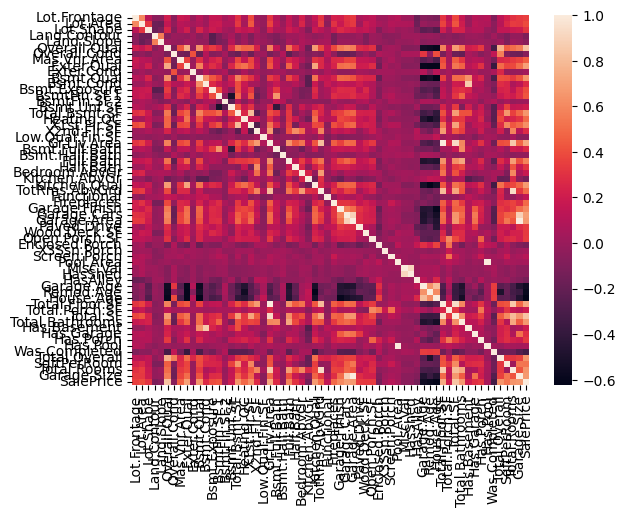

In [30]:
import seaborn as sns

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [31]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [32]:
from sklearn.feature_selection import mutual_info_regression

# calculates mutual_info_regression between the float64 columns and the target
mi = mutual_info_regression(X.select_dtypes(include=['float64']), y)

importances = sorted(list(zip(X.select_dtypes(include=['float64']).columns, mi)), key=lambda x: x[1], reverse=True)

importances

[('Total.SF', 0.7136675175426053),
 ('Total.Floor.SF', 0.5045546449005931),
 ('Gr.Liv.Area', 0.4974479216551382),
 ('Total.Bsmt.SF', 0.4022110061474633),
 ('Garage.Area', 0.39932313699990996),
 ('Garage.Size', 0.3988570014765447),
 ('Garage.Cars', 0.3961145186113353),
 ('Total.Rooms', 0.39024241571390395),
 ('House.Age', 0.36769738345111946),
 ('Total.Bathrooms', 0.36743602414236687),
 ('X1st.Flr.SF', 0.3652024010414774),
 ('Garage.Age', 0.3094370400273476),
 ('Remod.Age', 0.2648333575872437),
 ('Full.Bath', 0.2630542046229223),
 ('Lot.Frontage', 0.23456518882915933),
 ('X2nd.Flr.SF', 0.2098306744934666),
 ('TotRms.AbvGrd', 0.1983373641636459),
 ('SqftPerRoom', 0.19773523632827494),
 ('Open.Porch.SF', 0.1813345277587266),
 ('Lot.Area', 0.17731007775481),
 ('Fireplaces', 0.17147611031747512),
 ('BsmtFin.SF.1', 0.16760834523111257),
 ('Mas.Vnr.Area', 0.1667487827922458),
 ('Total.Porch.SF', 0.12495954751512572),
 ('Wood.Deck.SF', 0.11135223192239252),
 ('Bsmt.Unf.SF', 0.110886396015621),

In [33]:
# filter from X only importances above 0.15

for col, mi_score in importances:
    if mi_score < 0.05:
        X.drop(col, axis=1, inplace=True)

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2872 entries, 0 to 2929
Data columns (total 69 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS.SubClass      2872 non-null   object 
 1   MS.Zoning        2872 non-null   object 
 2   Lot.Frontage     2872 non-null   float64
 3   Lot.Area         2872 non-null   float64
 4   Lot.Shape        2872 non-null   int64  
 5   Land.Contour     2872 non-null   int64  
 6   Lot.Config       2872 non-null   object 
 7   Neighborhood     2872 non-null   object 
 8   Bldg.Type        2872 non-null   object 
 9   House.Style      2872 non-null   object 
 10  Overall.Qual     2872 non-null   int64  
 11  Overall.Cond     2872 non-null   int64  
 12  Roof.Style       2872 non-null   object 
 13  Mas.Vnr.Type     2872 non-null   object 
 14  Mas.Vnr.Area     2872 non-null   float64
 15  Exter.Qual       2872 non-null   int64  
 16  Exter.Cond       2872 non-null   int64  
 17  Foundation       28

<Axes: >

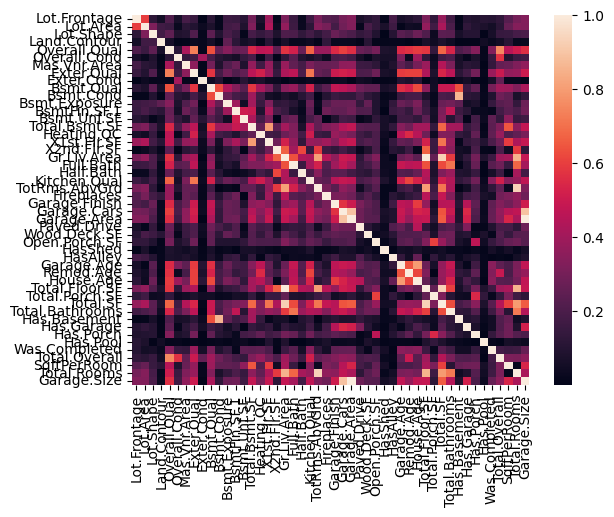

In [34]:
corr = X.corr(numeric_only=True)

sns.heatmap(corr.apply(abs), xticklabels=corr.columns, yticklabels=corr.columns)

In [35]:
corr = corr.apply(abs)
corr = corr[corr > 0.65]
corr = corr[corr < 1]

corr_dict = {}
for column in corr.columns:
    corr_dict[column] = corr[column][corr[column].notna()].index.tolist()
for key in list(corr_dict.keys()):
    if len(corr_dict[key]) == 0:
        del corr_dict[key]

corr_dict

{'Overall.Qual': ['Exter.Qual', 'Kitchen.Qual', 'Total.SF', 'Total.Overall'],
 'Exter.Qual': ['Overall.Qual', 'Kitchen.Qual'],
 'Bsmt.Cond': ['Has.Basement'],
 'Total.Bsmt.SF': ['X1st.Flr.SF', 'Total.SF'],
 'X1st.Flr.SF': ['Total.Bsmt.SF', 'Total.SF'],
 'X2nd.Flr.SF': ['Gr.Liv.Area', 'Total.Floor.SF'],
 'Gr.Liv.Area': ['X2nd.Flr.SF',
  'TotRms.AbvGrd',
  'Total.Floor.SF',
  'Total.SF',
  'Total.Rooms'],
 'Full.Bath': ['Total.Bathrooms', 'Total.Rooms'],
 'Kitchen.Qual': ['Overall.Qual', 'Exter.Qual'],
 'TotRms.AbvGrd': ['Gr.Liv.Area', 'Total.Floor.SF', 'Total.SF', 'Total.Rooms'],
 'Garage.Cars': ['Garage.Area', 'Garage.Size'],
 'Garage.Area': ['Garage.Cars', 'Total.SF', 'Garage.Size'],
 'Garage.Age': ['House.Age'],
 'House.Age': ['Garage.Age'],
 'Total.Floor.SF': ['X2nd.Flr.SF',
  'Gr.Liv.Area',
  'TotRms.AbvGrd',
  'Total.SF',
  'Total.Rooms'],
 'Total.SF': ['Overall.Qual',
  'Total.Bsmt.SF',
  'X1st.Flr.SF',
  'Gr.Liv.Area',
  'TotRms.AbvGrd',
  'Garage.Area',
  'Total.Floor.SF',
  'T

In [36]:
# Drop garage age

X.drop('Garage.Age', axis=1, inplace=True)

# Drop garage cars

X.drop('Garage.Cars', axis=1, inplace=True)

# Drop Total.Bsmt.SF

X.drop('Total.Bsmt.SF', axis=1, inplace=True)

In [37]:
# Function that creates a new feature from the ratio of the two features

def create_ratio_feature(df, feature1, feature2):
    new_feature = feature1 + '_' + feature2
    df[new_feature] = df[feature1] / df[feature2]
    df.drop(feature1, axis=1, inplace=True)
    df.drop(feature2, axis=1, inplace=True)
    return df

In [38]:
create_ratio_feature(X, 'TotRms.AbvGrd', 'Gr.Liv.Area')

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Lot.Shape,Land.Contour,Lot.Config,Neighborhood,Bldg.Type,House.Style,...,Has.Basement,Has.Garage,Has.Porch,Has.Pool,Was.Completed,Total.Overall,SqftPerRoom,Total.Rooms,Garage.Size,TotRms.AbvGrd_Gr.Liv.Area
0,20,RL,141.0,10.366309,2,4,Corner,NAmes,1Fam,1Story,...,True,True,True,False,True,11,553.555556,9.0,530.0,0.004227
1,20,RH,80.0,9.360741,1,4,Inside,NAmes,1Fam,1Story,...,True,True,True,False,True,11,587.333333,6.0,731.0,0.005580
2,20,RL,81.0,9.565775,2,4,Corner,NAmes,1Fam,1Story,...,True,True,True,False,True,12,578.000000,7.5,313.0,0.004515
3,20,RL,93.0,9.320181,1,4,Corner,NAmes,1Fam,1Story,...,True,True,False,False,True,12,595.826087,11.5,524.0,0.003791
4,60,RL,74.0,9.534668,2,4,Inside,Gilbert,1Fam,2Story,...,True,True,True,False,True,10,553.176471,8.5,484.0,0.003683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,8.979417,2,4,CulDSac,Mitchel,1Fam,SLvl,...,True,True,False,False,True,12,449.625000,8.0,590.0,0.005982
2926,20,RL,68.0,9.092232,2,1,Inside,Mitchel,1Fam,1Story,...,True,True,False,False,True,10,450.285714,7.0,486.0,0.005543
2927,85,RL,62.0,9.253591,1,4,Inside,Mitchel,1Fam,SFoyer,...,True,False,True,False,True,10,384.533333,7.5,0.0,0.006186
2928,20,RL,77.0,9.211440,1,4,Inside,Mitchel,1Fam,1Story,...,True,True,True,False,True,10,577.875000,8.0,420.0,0.004320


In [39]:
numeric_cols = X.select_dtypes(include=np.number).columns

numeric_cols

Index(['Lot.Frontage', 'Lot.Area', 'Lot.Shape', 'Land.Contour', 'Overall.Qual',
       'Overall.Cond', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Bsmt.Qual',
       'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.SF.1', 'Bsmt.Unf.SF',
       'Heating.QC', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Full.Bath', 'Half.Bath',
       'Kitchen.Qual', 'Fireplaces', 'Garage.Finish', 'Garage.Area',
       'Paved.Drive', 'Wood.Deck.SF', 'Open.Porch.SF', 'Remod.Age',
       'House.Age', 'Total.Floor.SF', 'Total.Porch.SF', 'Total.SF',
       'Total.Bathrooms', 'Total.Overall', 'SqftPerRoom', 'Total.Rooms',
       'Garage.Size', 'TotRms.AbvGrd_Gr.Liv.Area'],
      dtype='object')

In [40]:
from sklearn.linear_model import Lasso

params = {'alpha': 8e-05,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 50000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

lasso = Lasso(**params)

from sklearn.preprocessing import StandardScaler

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

#traintest split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

lasso.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_pred = lasso.predict(X_test)

RMSE = mean_squared_error(y_test, y_pred)

error_percent_lasso = 100 * (10**RMSE - 1)
print(f'Average error is {error_percent_lasso:.2f}%')

Average error is 0.52%


In [23]:
RMSE

0.0017267950007378583